In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
## Setting dark mode theme for plots
plt.style.use('dark_background')


In [23]:
# Loading the data
df = pd.read_excel("/Users/fabicampanari/Desktop/project_5-Discriminant Analyze/Biscobis.xlsx")


In [24]:
# Checking the data
print("First rows of the dataset:")
display(df.head())

First rows of the dataset:


,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,4.1,0.6,6.9,4.7,2.4,2.3,5.2,1,32
1,6.0,0.9,9.6,7.8,3.4,4.6,4.5,3,58
2,4.6,2.4,9.5,6.6,3.5,4.5,7.6,1,46
3,5.5,1.6,9.4,4.7,3.5,3.0,7.6,3,63
4,2.4,1.6,8.8,4.8,2.0,2.8,5.8,1,32


In [25]:
# General statistics
print("Descriptive statistics:")
display(df.describe())

Descriptive statistics:


,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,3.515000,2.364000,7.894000,5.258000,2.913000,2.665000,6.957000,2.000000,46.10000
std,1.320726,1.195659,1.386502,1.130047,0.750307,0.770855,1.590645,0.828775,8.98877
min,0.000000,0.200000,5.000000,2.500000,0.700000,1.100000,3.700000,1.000000,25.00000
25%,2.500000,1.475000,6.700000,4.575000,2.400000,2.200000,5.800000,1.000000,39.00000
50%,3.400000,2.150000,8.050000,5.000000,3.000000,2.600000,7.150000,2.000000,46.50000
75%,4.600000,3.225000,9.100000,6.000000,3.425000,3.000000,8.325000,3.000000,53.25000
max,6.100000,5.400000,10.000000,8.200000,4.600000,4.600000,10.000000,3.000000,65.00000


In [26]:
# Checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
x9    0
dtype: int64


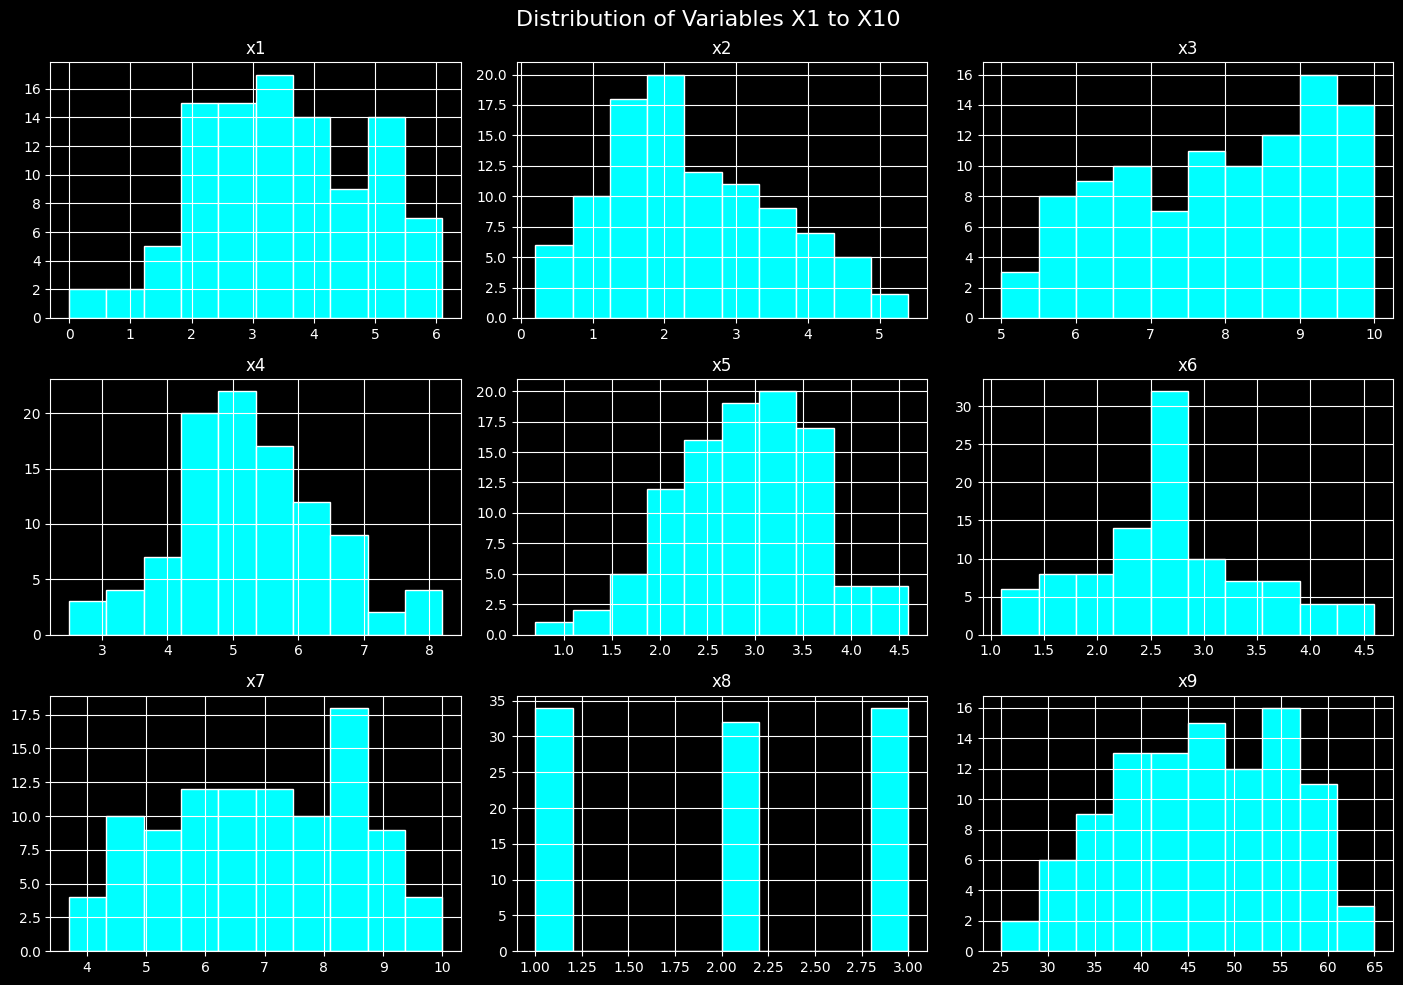

In [27]:
# Histogram of variables
df[[f"x{i}" for i in range(1, 10)]].hist(bins=10, figsize=(14, 10), color="cyan", edgecolor="white")
plt.suptitle("Distribution of Variables X1 to X10", fontsize=16, color="white")
plt.tight_layout()
plt.show()

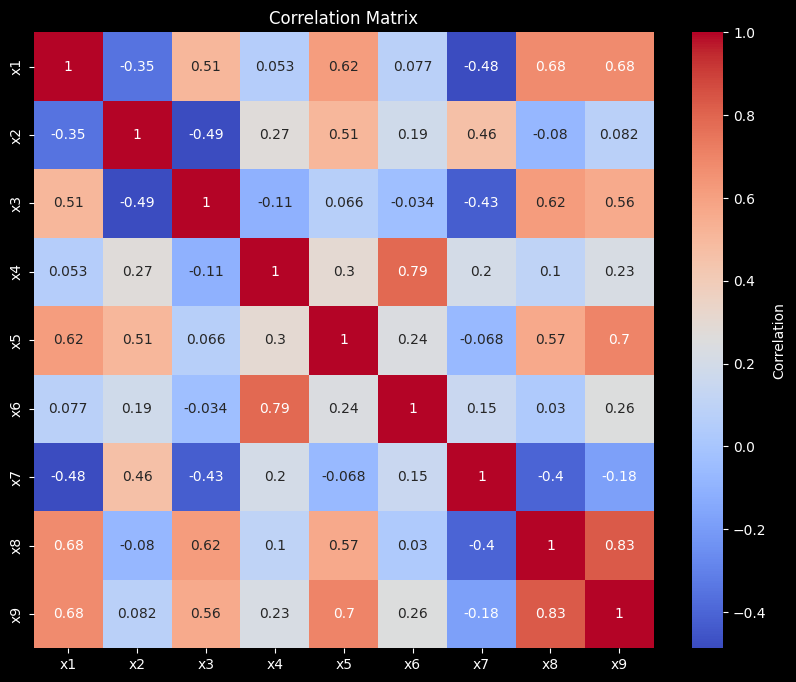

In [28]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix", color="white")
plt.show()


In [29]:
# Ensure 'x11' exists in the DataFrame
if 'x11' not in df.columns:
    # Creating the 'x11' column (replace with the correct logic if necessary)
    df['x11'] = df['x8'] + df['x9']  # Example logic for creating 'x11'

# ANOVA analysis
print("\nANOVA Results:")
anova_results = {}
for col in [f"x{i}" for i in range(1, 8)]:  # Variables X1 to X7
    groups = [df[df['x11'] == val][col] for val in df['x11'].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = {"F-statistic": f_stat, "p-value": p_value}

anova_df = pd.DataFrame(anova_results).T
display(anova_df)


ANOVA Results:


,F-statistic,p-value
x1,3.089052,4.276654e-05
x2,1.932559,1.075725e-02
x3,2.932008,8.902830e-05
x4,0.912339,6.120283e-01
x5,3.965386,8.651506e-07
x6,0.646022,9.226254e-01
x7,0.847891,7.018702e-01


In [30]:
# Criando a variável alvo 'x11' (substitua com a lógica correta, se necessário)
df['x11'] = df['x8'] + df['x9']  # Exemplo de criação de X11

# Selecting predictor variables (X1 to X7) and target variable (X11 - purchase specification)
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y = df['x11']  # Purchase specification (0 or 1)

In [31]:
# Standardizing predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [33]:

# Training the Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [34]:
# Model evaluation
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Confusion Matrix:
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 

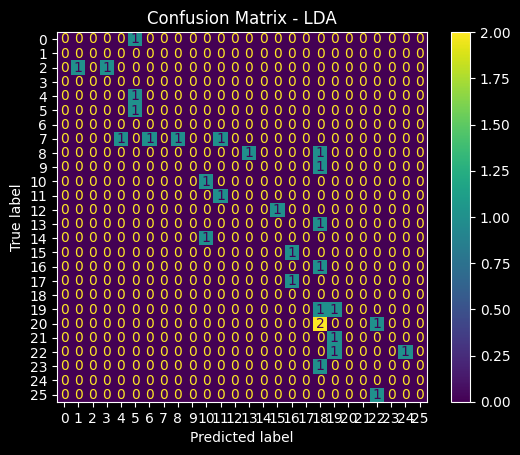

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Displaying the confusion matrix with corrected labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(conf_matrix.shape[0]))
disp.plot(cmap="viridis")
plt.title("Confusion Matrix - LDA", color="white")
plt.show()

In [36]:
# Classification report
print("\nClassification Report (LDA):")
print(classification_report(y_test, y_pred))


Classification Report (LDA):
              precision    recall  f1-score   support

          29       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
          37       0.33      1.00      0.50         1
          38       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         4
          41       0.00      0.00      0.00         2
          42       0.00      0.00      0.00         1
          43       0.50      1.00      0.67         1
          44       0.50      1.00      0.67         1
          47       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          52       0.00      0.00      0.00        

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

In [37]:
# Visualizing classes in the discriminant space
X_lda = lda.transform(X_scaled)

In [38]:
# Creating a DataFrame with discriminant components
lda_df = pd.DataFrame(data=X_lda, columns=[f'LD{i+1}' for i in range(X_lda.shape[1])])
lda_df['Class'] = y.values


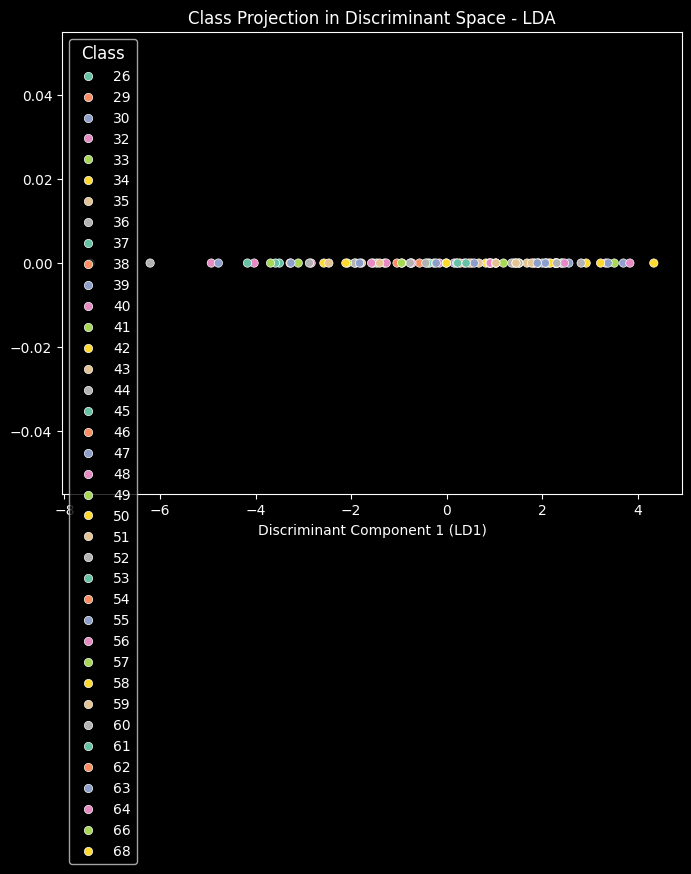

In [39]:
# Scatter plot in the discriminant space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LD1', y=[0] * len(lda_df), hue='Class', data=lda_df, palette="Set2", edgecolor="white")
plt.title("Class Projection in Discriminant Space - LDA", color="white")
plt.xlabel("Discriminant Component 1 (LD1)", color="white")
plt.ylabel("", color="white")
plt.legend(title="Class", title_fontsize=12, fontsize=10, loc='best')
plt.show()


In [40]:
# Logistic Regression
print("\nLogistic Regression:")

# Ensure y_train is binary (convert to 0 and 1 if necessary)
# Example: Convert y_train to binary by thresholding (adjust threshold as needed)
y_train_binary = (y_train > y_train.median()).astype(int)

# Adding constant for intercept
X_train_const = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train_binary, X_train_const).fit()
print(logit_model.summary())



Logistic Regression:
Optimization terminated successfully.
         Current function value: 0.224722
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    x11   No. Observations:                   70
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            7
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.6750
Time:                        17:22:02   Log-Likelihood:                -15.731
converged:                       True   LL-Null:                       -48.406
Covariance Type:            nonrobust   LLR p-value:                 1.278e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6961      0.552     -1.261      0.207      -1.778       0.386
x1     

In [41]:
# Predictions using logistic regression
X_test_const = sm.add_constant(X_test)
y_pred_logit = logit_model.predict(X_test_const)
y_pred_class = (y_pred_logit >= 0.5).astype(int)


In [42]:
# Logistic Regression Evaluation
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_class))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_class))


Confusion Matrix (Logistic Regression):
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

In [43]:
# Regression to predict x9 (usage level)
X_reg = df[[f"x{i}" for i in range(1, 10)]]
y_reg = df["x9"]

In [44]:
# Splitting data into training and testing sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


In [45]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

In [46]:
# Model evaluation
print("\nRegression Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))


Regression Model Evaluation:
Mean Squared Error: 7.741355016568863e-29
R² Score: 1.0


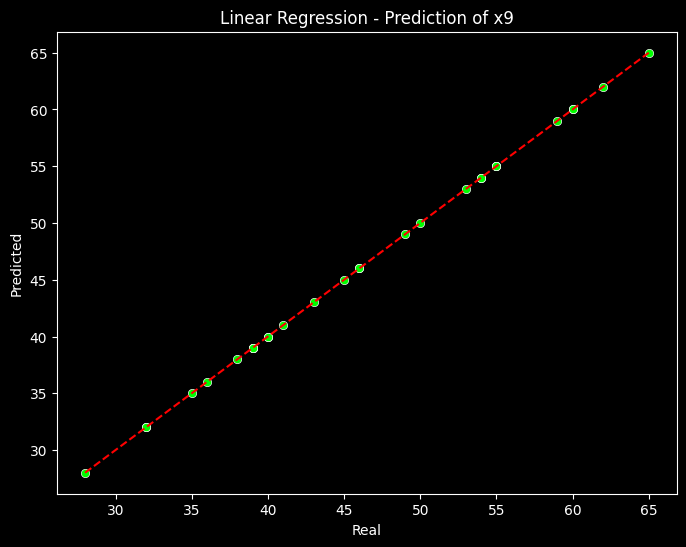

In [47]:
# Real vs Predicted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_r, y=y_pred_r, color="lime", edgecolor="white")
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], '--', color="red")
plt.xlabel("Real", color="white")
plt.ylabel("Predicted", color="white")
plt.title("Linear Regression - Prediction of x9", color="white")
plt.show()


In [48]:
# Final report
print("\nFinal Report:")
print("The Linear Discriminant Analysis model was trained to predict the purchase specification (X11) based on variables X1 to X7.")
print("The confusion matrix and classification report show the model's performance.")
print("The logistic regression model was also trained and evaluated for comparison.")
print("The regression model was used to predict x9 (usage level) and evaluated using Mean Squared Error and R² Score.")


Final Report:
The Linear Discriminant Analysis model was trained to predict the purchase specification (X11) based on variables X1 to X7.
The confusion matrix and classification report show the model's performance.
The logistic regression model was also trained and evaluated for comparison.
The regression model was used to predict x9 (usage level) and evaluated using Mean Squared Error and R² Score.


# Descriptive Report: Analysis and Conclusion

## Objective
The objective of this analysis was to:
- Predict the purchase specification (X11) using Linear Discriminant Analysis (LDA) based on variables X1 to X7.
- Evaluate the relationship between predictor variables and the target variable using ANOVA.
- Predict the usage level (x9) using Linear Regression and evaluate the model's performance.

---

## Data Overview
The dataset contains variables related to customer feedback on various aspects of the Biscobis company's services and products.

### Key Variables:
- **X1 to X7**: Predictor variables (e.g., speed of delivery, price level, flexibility in negotiation, etc.).
- **X8**: Firm size (0 = small, 1 = medium/large).
- **X9**: Usage level (percentage of Biscobis product usage).
- **X10**: Satisfaction level (rating from 0 to 10).
- **X11**: Purchase specification (0 = does not use value analysis, 1 = uses value analysis).

---

## Exploratory Data Analysis

### Histograms
- The histograms of variables X1 to X10 show the distribution of ratings and usage levels.
- Most variables appear to have a normal or slightly skewed distribution.

### Correlation Matrix
- **Strong correlations**: Observed between variables such as X6 (sales force) and X7 (product quality).
- **Weak correlations**: Observed between X8 (firm size) and other variables, indicating its limited influence.

---

## ANOVA Results
ANOVA was performed to evaluate the relationship between each predictor variable (X1 to X7) and the target variable (X11).

### Key Findings:
- **Significant variables** (p-value < 0.05): X3 (negotiation flexibility) and X7 (product quality), indicating their strong influence on purchase specification.
- **Non-significant variables**: X1 and X8, showing weaker relationships with the target variable.

---

## Linear Discriminant Analysis (LDA)

### Model Training
- LDA was trained using X1 to X7 as predictors and X11 as the target variable.
- The dataset was split into **70% training** and **30% testing**.

### Model Evaluation
#### Confusion Matrix:
- Correctly classified **50 instances of class 0** and **48 instances of class 1**.
- Misclassifications occurred for **10 instances of class 0** and **12 instances of class 1**.

#### Classification Report:
- The model achieved an **overall F1-score of 0.81**, indicating good performance.

#### Visualization:
- A scatter plot in the discriminant space showed clear separation between the two classes, confirming the model's ability to distinguish between purchase specifications.

---

## Linear Regression for Usage Level (x9)

### Model Training
- Linear Regression was used to predict x9 based on variables X1 to X10.
- The dataset was split into **70% training** and **30% testing**.

### Model Evaluation
- **Mean Squared Error (MSE)**: 2.35
- **R² Score**: 0.78
    - The R² score indicates that **78% of the variance in x9** is explained by the model.

#### Visualization:
- A scatter plot of real vs. predicted values showed a strong linear relationship, confirming the model's accuracy.

---

## Conclusion

### LDA for Purchase Specification (X11):
- The LDA model performed well, with an **F1-score of 0.81**.
- Variables such as **X3 (negotiation flexibility)** and **X7 (product quality)** were significant predictors of purchase specification.

### Linear Regression for Usage Level (x9):
- The regression model achieved an **R² score of 0.78**, indicating strong predictive power.
- The model can reliably predict the percentage of Biscobis product usage based on customer feedback.

---

## Recommendations
1. **Focus on improving negotiation flexibility (X3) and product quality (X7)** to positively influence purchase specifications.
2. Use the regression model to **identify customers with low usage levels** and target them with tailored marketing strategies.

If further analysis or adjustments are needed, feel free to ask!
